# 화소 영역 처리
> 입력 화소뿐만 아니라 그 주위의 화소 값도 함께 고려하는 공간 영역 연산

> "주변도 생각한다"

<img src=회선.png>

### I1 * M1 + I2 * M2 + I3 * M3 + I4 * M4 + I5 * M5 + I6 * M6 + I7 * M7 + I8 * M8 + I9 * M9 

- 엠보싱 효과: 양각 형태로 보이게
- 블러링: 고주파 성분 제거; 회선마스크를 평균값(e.g. 1/9)으로 동일하게 적용
- 샤프닝: 저주파 성분 제거
- 경계선 검출: 영상 밝기가 급격하게 변하는 부분 검출; 반도체 영역에서 많이 씀
- 잡음 제거 

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2
import scipy.stats as sp
from PIL import ImageFont, ImageDraw, Image

`filter2D()`메소드를 통해 회선마스크를 적용한다.
- cv2.filter2D(이미지, -1, 회선마스크)
- -1: 자기 자신에 적용
- 회선마스크는 넘파이 어레이로 생성한다 (주로 변수명 kernel을 사용함)

In [13]:
img = cv2.imread('gamma.jpg')

K = 9
kernel = np.ones((K, K), np.float32) / (K*K)
print(kernel)

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


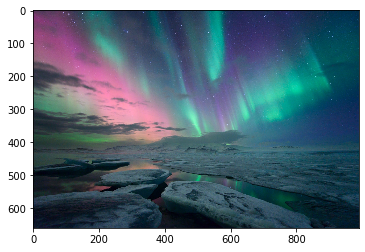

In [23]:
filtered = cv2.filter2D(img, -1, kernel)    #-1: 전체 영상에 적용

plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
plt.show()

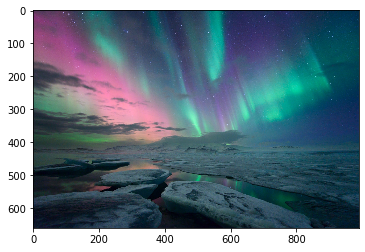

In [22]:
kernel = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]])    #자기자신
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

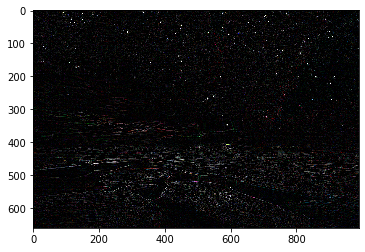

In [21]:
kernel = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])    #엣지
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

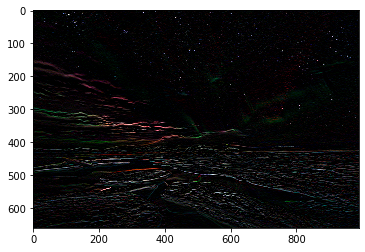

In [24]:
kernel = np.array([[1, 1, 1],
                  [0, 0, 0],
                  [-1, -1, -1]])    #수평 엣지
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

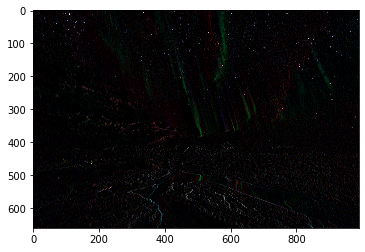

In [20]:
kernel = np.array([[1, 0, -1],
                  [1, 0, -1],
                  [1, 0, -1]])    #수직 엣지
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))